# Effective Data Visualization Tutorial

## Roadmap

Welcome to this tutorial on data visualization with Python. In this guide, we will explore the fundamentals of data visualization, its importance, and how to enhance problematic data visualizations.

To get started, we'll begin by importing the necessary libraries. Below is a list of the required libraries. If you haven't already installed these libraries, you can use `pip install` to do so. Don't worry about the details of the code for now; we'll explain each line later in class.

In [227]:
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from calendar import month_abbr
from scipy.stats import skewnorm
from matplotlib.ticker import MaxNLocator
from IPython.display import display, Image

## Getting Some Data

To illustrate how data visualization can help, let's start by obtaining and examining a dataset. In this tutorial, we'll be working with data related to US counties. This dataset includes information on the birth rate among teenagers (aged 15 to 19), per capita income, unemployment rate, the percentage of teenagers living below the poverty line, and the female teenager population.

Before we dive into data visualization, we need to acquire and load the dataset. Below, I'll demonstrate how to obtain the raw data and prepare it for visualization.

In [191]:
teenage_pregnancy_data = pd.read_csv('https://raw.githubusercontent.com/lgarceztech/Visualization-lecture-examples/main/teenage_pregnancy_example.csv', encoding='utf-8', on_bad_lines='skip')
teenage_pregnancy_data = teenage_pregnancy_data.dropna(subset=['state_name', 'county'])
teenage_pregnancy_data = teenage_pregnancy_data[teenage_pregnancy_data['Year'] == 2017]
teenage_pregnancy_data

,state_name,Year,State_CountyFIPS,county,birthrate,per_capita_income,unemployment_rate,poverty_percent_all,cdc_fpop_yr1519
48,Alabama,2017,1001,Autauga,22.400000,39221.0,5.1,13.5,1846.0
65,Alabama,2017,1003,Baldwin,23.299999,43623.0,5.4,11.7,6207.0
82,Alabama,2017,1005,Barbour,35.799999,31288.0,8.4,29.9,698.0
99,Alabama,2017,1007,Bibb,33.700001,28681.0,6.5,20.1,565.0
116,Alabama,2017,1009,Blount,28.600000,32686.0,5.4,14.1,1764.0
...,...,...,...,...,...,...,...,...,...
55722,Wyoming,2017,56037,Sweetwater,25.799999,48125.0,6.1,9.8,1442.0
55739,Wyoming,2017,56039,Teton,8.700000,207571.0,3.5,7.3,474.0
55756,Wyoming,2017,56041,Uinta,25.000000,37627.0,5.8,10.6,679.0
55773,Wyoming,2017,56043,Washakie,20.200001,44388.0,4.8,13.1,238.0


## How Can Data Visualization Help?

Understanding the overall data becomes challenging when dealing with numbers alone. Now that we have identified the variables and their types, including whether they are text, dates, numbers, rates, etc., we can turn to data visualization for a clearer understanding.

Our journey into data visualization begins with plotting histograms. While we'll delve deeper into histograms later, think of them as representations of the number of counties within specified intervals of teenage birth rates or poverty rates. For instance, a histogram may reveal that approximately 160 counties have a teenage poverty rate ranging from 20% to 22%. 

Histograms provide insights into the distribution of data, allowing us to grasp the broader situation. For example, by examining the histogram below, we can conclude that the number of counties with 60% or more teenagers living in poverty is relatively small. These patterns and trends become much more apparent and comprehensible when data is visualized.

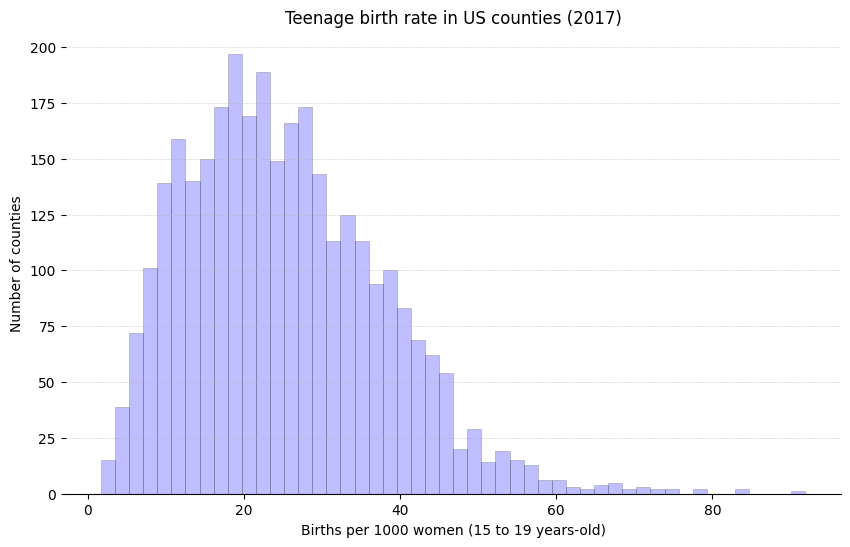

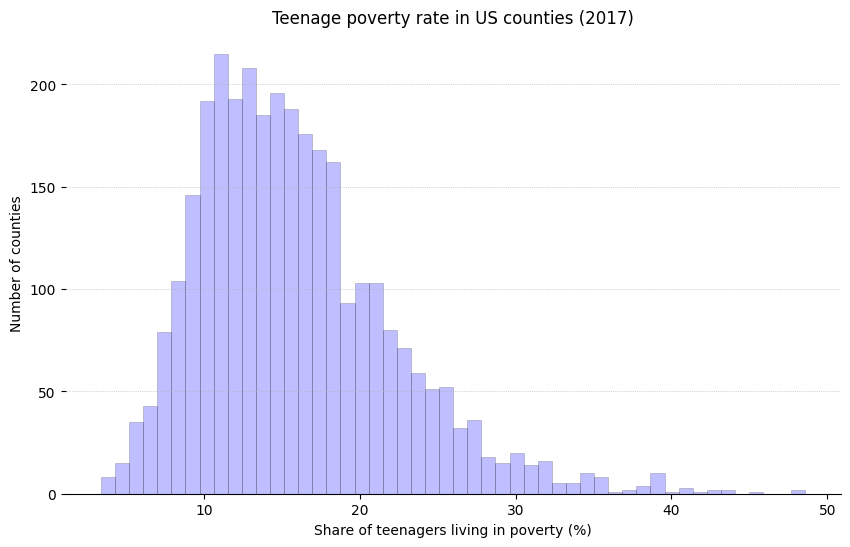

In [228]:
def plot_histogram(data, title, xlabel, ylabel, bins=50):
    median_value = np.median(data)
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, color='blue', alpha=0.25, edgecolor='black', linewidth=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    plt.grid(True)
    ax.yaxis.grid(True, linestyle=':', linewidth=0.5)
    ax.xaxis.grid(False)
    #plt.axvline(median_value, color='darkred', linestyle='dashed', linewidth=0.75)
    #plt.text(median_value, plt.ylim()[1]*0.98, f' Median: {median_value:.2f} ', color='darkred', horizontalalignment='right')
    plt.show()
plot_histogram(teenage_pregnancy_data['birthrate'], 'Teenage birth rate in US counties (2017)','Births per 1000 women (15 to 19 years-old)','Number of counties')
plot_histogram(teenage_pregnancy_data['poverty_percent_all'], 'Teenage poverty rate in US counties (2017)','Share of teenagers living in poverty (%)','Number of counties')

## Choosing the Appropriate Visualization

One visualization method that proves particularly insightful is the scatter plot. Scatter plots are valuable for investigating potential relationships between two variables and understanding their variability. 

In the upcoming section, we will create a scatter plot that explores the relationship between teenage poverty and teenage fertility. Each circle on the plot represents a county, with its position indicating the percentage of teenagers living in poverty for that county and the number of births per 1000 teenage girls. Additionally, the size of the circles corresponds to the population of the county, enabling us to explore whether county size plays a role in this relationship.

In [272]:
def show_scatterplot():
    plt.scatter(teenage_pregnancy_data['poverty_percent_all'],teenage_pregnancy_data['birthrate'],alpha=0.2,  s=teenage_pregnancy_data['cdc_fpop_yr1519'] * 0.005, color=(0, 0.5, 0.7), label='DataFrame 1')
    plt.xlabel('Share of teenagers living in poverty (%)')
    plt.ylabel('Births per 1000 women (15 to 19 years-old)')
    plt.title('Teenage poverty and fertility across US counties (2017)')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    plt.grid(True)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4)) 
    ax.yaxis.grid(True, linestyle=':', linewidth=0.5)
    ax.xaxis.grid(False)
    plt.xlim([0, 50])
    plt.ylim([0, 80])
    plt.subplots_adjust(bottom=0.15)
    plt.figtext(0.5, 0.01, "Circles are proportional to each county's population. Source: National Center for Health Statistics and  U.S. Census, 2017", ha="center", fontsize=8, color=(0.25,0.25,0.25))
    plt.figure(figsize=(6, 6))
    plt.show()


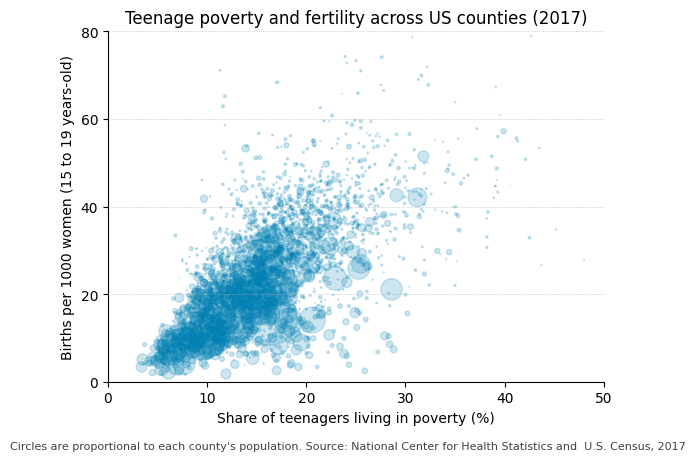

<Figure size 600x600 with 0 Axes>

In [273]:
show_scatterplot()

## Making a Hypothesis

Upon examining the graph, it becomes apparent that there may be a connection between the teenage poverty rate and teenage fertility. While there is considerable variability in the data, a pattern emerges: counties with higher poverty rates also tend to have higher fertility rates among teenagers. This observation suggests that there might be a relationship worth exploring.

It's important to note that various factors could contribute to this relationship, adding to the observed variability. Additionally, there could be unobserved factors that influence both poverty and teenage fertility, making it challenging to assert that poverty directly causes teenage fertility. However, the graph serves as a valuable tool for generating a hypothesis that can be tested and further explored.


## Reworking Graphs: Fruit Sales

In this section, we will revisit and rework some graphs we encountered in class, starting with the example of fruit sales. We'll follow a structured approach: first, we'll visualize the original graph, then recreate the original data. Subsequently, we will strive to enhance the visualization.

The primary challenge with the following 3D graph is its readability. It's difficult to precisely determine the height of each column, making it less user-friendly. Additionally, the color code employed doesn't facilitate interpretation. Lastly, given the numerous columns, it becomes almost impossible to discern the sales of lemons for specific months.

In [231]:
display(Image(url='https://github.com/lgarceztech/Visualization-lecture-examples/blob/main/fruit.png?raw=true'))
data = {
    'Year': [2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
    'Fruit': ['Lemons','Oranges','Bananas','Apples','Lemons', 'Oranges', 'Bananas','Apples','Lemons', 'Oranges', 'Bananas','Apples','Lemons', 'Oranges', 'Bananas','Apples'],
    'Month': ['Jan','Jan','Jan','Jan','Feb','Feb','Feb','Feb','Mar','Mar','Mar','Mar','Apr','Apr','Apr','Apr'],
    'Period': [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4],
    'Units sold': [72,18,58,31, 10, 31, 40, 40,10, 58, 60, 63, 21, 9, 71, 59]
}
fruit_sales = pd.DataFrame(data)
fruit_sales['Date'] = pd.to_datetime(fruit_sales['Year'].astype(str) + '-' + fruit_sales['Period'].astype(str))
fruit_sales

,Year,Fruit,Month,Period,Units sold,Date
0,2023,Lemons,Jan,1,72,2023-01-01
1,2023,Oranges,Jan,1,18,2023-01-01
2,2023,Bananas,Jan,1,58,2023-01-01
3,2023,Apples,Jan,1,31,2023-01-01
4,2023,Lemons,Feb,2,10,2023-02-01
5,2023,Oranges,Feb,2,31,2023-02-01
6,2023,Bananas,Feb,2,40,2023-02-01
7,2023,Apples,Feb,2,40,2023-02-01
8,2023,Lemons,Mar,3,10,2023-03-01
9,2023,Oranges,Mar,3,58,2023-03-01


In [287]:
fig = sp.make_subplots(rows=1, cols=1)
trace1 = go.Bar(x=fruit_sales[fruit_sales['Fruit'] == "Oranges"]['Month'], y=fruit_sales[fruit_sales['Fruit'] == "Oranges"]['Units sold'], name='Oranges',marker=dict(color='rgba(255, 165, 0, 0.6)'))
fig.add_trace(trace1, row=1, col=1)
trace2 = go.Bar(x=fruit_sales[fruit_sales['Fruit'] == "Apples"]['Month'], y=fruit_sales[fruit_sales['Fruit'] == "Apples"]['Units sold'], name='Apples',marker=dict(color='rgba(255, 0, 0, 0.6)'))
fig.add_trace(trace2, row=1, col=1)
trace3 = go.Bar(x=fruit_sales[fruit_sales['Fruit'] == "Bananas"]['Month'], y=fruit_sales[fruit_sales['Fruit'] == "Bananas"]['Units sold'], name='Bananas',marker=dict(color='rgba(255, 255, 0, 0.6)'))
fig.add_trace(trace3, row=1, col=1)
trace4 = go.Bar(x=fruit_sales[fruit_sales['Fruit'] == "Lemons"]['Month'], y=fruit_sales[fruit_sales['Fruit'] == "Lemons"]['Units sold'], name='Lemons',marker=dict(color='rgba(0, 128, 0, 0.6)'))
fig.add_trace(trace4, row=1, col=1)
fig.update_layout(xaxis_title='Month',yaxis_title='Units Sold')
fig.update_layout(bargap=0.2, yaxis=dict(showgrid=True, gridwidth=1, gridcolor='white', showline=True, zeroline=True),title='Monthly Units Sold for Fruits (2023)')
fig.add_annotation(text='Source: Sales department.',xref='paper', yref='paper',x=0.95, y=-0.2,showarrow=False,font=dict(size=10, color='gray'))
fig.show()


## Reworking Graphs: Truncated Axes

Graphs with truncated axes, where they start above zero, can distort differences and mislead interpretation. Take, for instance, the reports on the percentage of Americans identifying as Christians and the elections in Venezuela.

After fixing such graphs, we can observe that the change in American Christianity didn't vary significantly, and the difference between Maduro and Capriles in the Venezuelan elections was relatively small.


In [233]:
display(Image(url='https://github.com/lgarceztech/Visualization-lecture-examples/blob/main/christians.png?raw=true'))
data = {
    'Christian share': [77,65],
    'Year': ["2009","2019"]
}
christianity_us = pd.DataFrame(data)
christianity_us

,Christian share,Year
0,77,2009
1,65,2019


In [255]:
fig = sp.make_subplots(rows=1, cols=1)
trace1 = go.Bar(x=christianity_us['Year'], y=christianity_us['Christian share'], text=christianity_us['Christian share'],marker=dict(color='rgba(250, 105, 30, 0.5)'))
fig.add_trace(trace1, row=1, col=1)
fig.update_layout(xaxis_title='Year',yaxis_title='Christian share (%)')
fig.update_layout(bargap=0.5, yaxis=dict(range=[0, 100],showgrid=True, gridwidth=1, gridcolor='white', showline=True, zeroline=True),title='Share of Americans who self-identify as christians')
fig.add_annotation(text='Source: Pew Research Center.',xref='paper', yref='paper',x=0.95, y=-0.2,showarrow=False,font=dict(size=10, color='gray'))
fig.show()

In [235]:
display(Image(url='https://github.com/lgarceztech/Visualization-lecture-examples/blob/main/venezuela.png?raw=true'))
data = {
    'Candidate': ['Maduro','Capriles'],
    'Vote share': [50.66,49.07],
    'Election year': [2013,2013]
}
venezuela_elections = pd.DataFrame(data)
venezuela_elections

,Candidate,Vote share,Election year
0,Maduro,50.66,2013
1,Capriles,49.07,2013


In [288]:
fig = sp.make_subplots(rows=1, cols=1)
trace1 = go.Bar(x=venezuela_elections['Candidate'], y=venezuela_elections['Vote share'], text=venezuela_elections['Vote share'],marker=dict(color=['rgba(200, 10, 10, 0.3)','rgba(10, 10, 200, 0.3)']))
fig.add_trace(trace1, row=1, col=1)
fig.update_layout(xaxis_title='Year',yaxis_title='Share of the votes (%)')
fig.update_layout(yaxis=dict(range=[0, 100],showgrid=True, gridwidth=1, gridcolor='white', showline=True, zeroline=True),title='Venezuelan elections results (2013)')
fig.add_annotation(text='Source: Venezolana de Television.',xref='paper', yref='paper',x=0.95, y=-0.2,showarrow=False,font=dict(size=10, color='gray'))
fig.update_layout(bargap=0.5)
fig.show()

## Exercise: Research on Marijuana

Now, it's your turn to apply the same structured approach we used to recreate the graph below. Keep in mind that a pie chart might not be the best choice in this context, as we are comparing the share of people who have tried marijuana in different time periods. These shares do not necessarily add up to 100%.

Your task is to rework this graph, ensuring that it accurately represents the data and is more suitable for comparing the share of people who have tried marijuana over different time periods.


In [237]:
display(Image(url='https://github.com/lgarceztech/Visualization-lecture-examples/blob/main/marijuana.png?raw=true'))
data = {
    'Year': [1997,2018,2019],
    'Tried marijuana': [0.34,0.43,0.51],
    'Did not try': [0.66,0.57,0.49]
}
tried_marijuana_us = pd.DataFrame(data)
tried_marijuana_us

,Year,Tried marijuana,Did not try
0,1997,0.34,0.66
1,2018,0.43,0.57
2,2019,0.51,0.49


## Distracting Your Audience?

The following plot demonstrates how to represent changes in variables over extended periods of time. However, there are notable issues with this graph that can distract the audience.

One problem is the lack of axes and the small legends, which makes it challenging to interpret the data. Additionally, the map included in the graph is not conducive to understanding, as the data pertains to the whole US, not particular states. The map just distracts the audience. Furthermore, the choice of an area graph may not be ideal here, as the shares can add up to more than 100%. This is because individuals can identify with multiple races and ethnicities, making it essential to select a more appropriate visualization method.

In [238]:
display(Image(url='https://github.com/lgarceztech/Visualization-lecture-examples/blob/main/race.png?raw=true'))
data = {
    'Year':[1960,1970,1980,1990,2000,2010,2020,2060],
    'White Share':[88.6,87.7,83.1,80.3,75.1,72.4,61.6,31.5],
    'Black Share':[10.5,11.1,11.7,12.1,12.3,12.6,12.4,13.2],
    'Hispanic Share':[3.2,4.4,6.4,9.0,12.5,16.3,18.7,31.5],
    'Asian Share':[0.5,0.8,1.5,2.9,3.8,4.9,6.2,8.1]
}
racial_demographics_us = pd.DataFrame(data)
racial_demographics_us

,Year,White Share,Black Share,Hispanic Share,Asian Share
0,1960,88.6,10.5,3.2,0.5
1,1970,87.7,11.1,4.4,0.8
2,1980,83.1,11.7,6.4,1.5
3,1990,80.3,12.1,9.0,2.9
4,2000,75.1,12.3,12.5,3.8
5,2010,72.4,12.6,16.3,4.9
6,2020,61.6,12.4,18.7,6.2
7,2060,31.5,13.2,31.5,8.1


In [258]:
fig = px.line(racial_demographics_us,x='Year',
    y=['Black Share', 'Asian Share', 'Hispanic Share'], 
    title='US racial composition by year',
    labels={'value': 'Percentage Share'},
    line_shape='linear'
)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Percentage',
    yaxis_ticksuffix='%',
    yaxis_range=[-1, 35],
    legend_title='Race',
)

fig.add_annotation(text='Source: US Census Bureau.',xref='paper', yref='paper',x=0.95, y=-0.2,showarrow=False,font=dict(size=10, color='gray'))


fig.show()

## Exercise: Female Heights

Now, it's time for another exercise. Following the same structured approach we used in the previous exercise, recreate the graph below. However, unlike the original graph, do not truncate the axes or change their scale. Pay attention to how this affects your perception of the height differences.


Your task is to rework this graph, ensuring that it accurately represents the data. Consider how the decision not to truncate the axes impacts the interpretation of height differences.


In [241]:
display(Image(url='https://github.com/lgarceztech/Visualization-lecture-examples/blob/main/height.png?raw=true'))
    
data = {
    'Country': ['Latvia','Australia','Scotland','Peru','South Africa','India'],
    'Average Height': [5.5,5.4,5.4,5.4,5.2,5.0]
}
female_height = pd.DataFrame(data)
female_height

,Country,Average Height
0,Latvia,5.5
1,Australia,5.4
2,Scotland,5.4
3,Peru,5.4
4,South Africa,5.2
5,India,5.0


## Pie and Donut Charts

While pie charts are frequently used in media, the data visualization literature often advises against them in many cases. They become challenging to read when there are too many categories, and when proportions are similar, it can be challenging to distinguish which category is larger.

In the following example, we present a pie chart illustrating the world population. However, to address some of these challenges, we've grouped smaller countries together to reduce the number of categories. Additionally, we've included percentages to help readers identify the largest segments. This approach not only simplifies the chart but also makes it easier to comprehend the magnitude of China's and India's populations.

In [242]:
display(Image(url='https://github.com/lgarceztech/Visualization-lecture-examples/blob/main/population.png?raw=true'))
data = {
    'Country': ['China','India','USA','Indonesia','Pakistan','Brazil','Nigeria','Others'],
    'World Population Share': [0.1851,0.1779,0.0426,0.0353,0.0286,0.0277,0.0267,0.4761]
}
world_pop_share = pd.DataFrame(data)
world_pop_share

,Country,World Population Share
0,China,0.1851
1,India,0.1779
2,USA,0.0426
3,Indonesia,0.0353
4,Pakistan,0.0286
5,Brazil,0.0277
6,Nigeria,0.0267
7,Others,0.4761


In [259]:
trace = go.Pie(
    labels=country_df['Country'],
    values=country_df['World Population Share'],
    hole=0.3,
)
layout = go.Layout(title='World Population Share by Country', legend=dict(font=dict(size=20)))
fig = go.Figure(data=[trace], layout=layout)
fig.add_annotation(text='Source: World Bank.',xref='paper', yref='paper',x=0.95, y=-0.2,showarrow=False,font=dict(size=10, color='gray'))
fig.show()

## Exercise: Weather Forecast

For this exercise, we'll tackle the visualization of a weather forecast. The initial graph lacks clarity, as it doesn't provide clear information about what the bars and colors represent. It appears that they depict something other than temperature, given that the tallest bar does not correspond to 85 degrees.

Using the provided data, assume that we are plotting temperature and the probability of rain. This exercise is more challenging, as it will likely require combining two types of plots, such as a bar graph and a line graph.

Your task is to recreate this graph, ensuring that it accurately represents temperature and rain probability while addressing the issues observed in the original visualization.

In [226]:
display(Image(url='https://github.com/lgarceztech/Visualization-lecture-examples/blob/main/weather.png?raw=true'))
data = {
    'Day': ['Tue','Wed','Thu','Fri','Sat','Sun','Mon'],
    'Temperature': [66,75,78,85,79,63,59],
    'Probability of precipitation': [0.3,0.32,0.32,0.33,0.34,0.3,0.29]
}
weather_data = pd.DataFrame(data)
weather_data

,Day,Temperature,Probability of precipitation
0,Tue,66,0.30
1,Wed,75,0.32
2,Thu,78,0.32
3,Fri,85,0.33
4,Sat,79,0.34
5,Sun,63,0.30
6,Mon,59,0.29
